In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date, timedelta
import seaborn as sns
import numpy as np
from sklearn import metrics as mt

In [2]:
data_train_actual  = pd.read_csv("UK_train.csv")
data_test_actual = pd.read_csv("UK_test.csv")
data_train_forecast  = pd.read_csv("train_UK_forecast.csv")
data_test_forecast = pd.read_csv("test_UK_forecast.csv")

data_train_actual.reset_index(inplace=True, drop = True)  
data_test_actual.reset_index(inplace=True, drop = True)
data_train_forecast.reset_index(inplace=True, drop = True)
data_test_forecast.reset_index(inplace=True, drop = True) 

In [3]:
data_train_actual.drop(columns = ["Unnamed: 0"], inplace =True)
data_test_actual.drop(columns = ["Unnamed: 0"], inplace =True)
data_train_forecast.drop(columns = ["Unnamed: 0"], inplace =True)
data_test_forecast.drop(columns = ["Unnamed: 0"], inplace =True)

In [4]:
data_train_actual.tail()

,timestamps,prices,emissions
15763,2019-10-19 19:00:00,35.97,200.0
15764,2019-10-19 20:00:00,39.67,181.0
15765,2019-10-19 21:00:00,51.75,164.0
15766,2019-10-19 22:00:00,67.19,133.0
15767,2019-10-19 23:00:00,57.56,121.0


Text(0, 0.5, 'Emissions (CO2eq/kWh)')

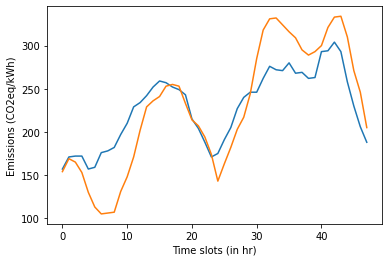

In [5]:
data_train_actual["emissions"][:48].plot()
data_train_forecast["emissions"][:48].plot()
plt.xlabel("Time slots (in hr)")
plt.ylabel("Emissions (CO2eq/kWh)")

Text(0, 0.5, 'Emissions (CO2eq/kWh)')

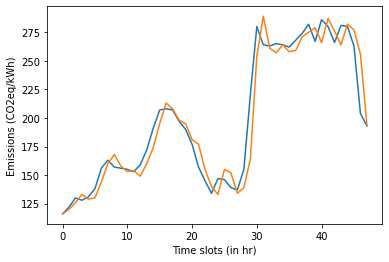

In [6]:
data_test_actual["emissions"][:48].plot()
data_test_forecast["emissions"][:48].plot()
plt.xlabel("Time slots (in hr)")
plt.ylabel("Emissions (CO2eq/kWh)")

Text(0, 0.5, 'Prices (euros/kWh)')

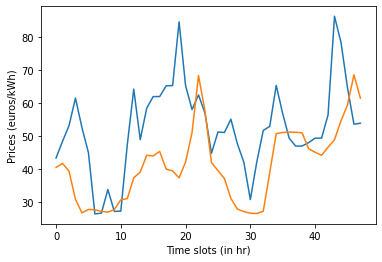

In [7]:
data_train_actual["prices"][:48].plot()
data_test_actual["prices"][:48].plot()
plt.xlabel("Time slots (in hr)")
plt.ylabel("Prices (euros/kWh)")

In [8]:
data_train_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  15768 non-null  object 
 1   prices      15768 non-null  float64
 2   emissions   15768 non-null  float64
dtypes: float64(2), object(1)
memory usage: 369.7+ KB


In [9]:
data_test_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10536 entries, 0 to 10535
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  10536 non-null  object 
 1   prices      10535 non-null  float64
 2   emissions   10535 non-null  float64
dtypes: float64(2), object(1)
memory usage: 247.1+ KB


In [10]:
data_train_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  15768 non-null  object 
 1   prices      15768 non-null  float64
 2   emissions   15768 non-null  float64
dtypes: float64(2), object(1)
memory usage: 369.7+ KB


In [11]:
data_test_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10536 entries, 0 to 10535
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  10536 non-null  object 
 1   prices      10536 non-null  float64
 2   emissions   10536 non-null  float64
dtypes: float64(2), object(1)
memory usage: 247.1+ KB


In [12]:
mp_1 = data_train_actual[data_train_actual['prices'].isnull()].index.tolist()
mc_1 = data_train_actual[data_train_actual['emissions'].isnull()].index.tolist()

mp_2 = data_test_actual[data_test_actual['prices'].isnull()].index.tolist()
mc_2 = data_test_actual[data_test_actual['emissions'].isnull()].index.tolist()

mp_3 = data_train_forecast[data_train_forecast['prices'].isnull()].index.tolist()
mc_3 = data_train_forecast[data_train_forecast['emissions'].isnull()].index.tolist()

mp_4 = data_test_forecast[data_test_forecast['prices'].isnull()].index.tolist()
mc_4 = data_test_forecast[data_test_forecast['emissions'].isnull()].index.tolist()

In [13]:
mp_1, mp_2, mp_3, mp_4

([], [3864], [], [])

In [14]:
def remove_elements_given_element(unwanted_num, list1):
    lst=[]
    for ele in list1: 
        if ele not in unwanted_num:
            lst.append(ele)
    return lst
    
            
def remove_elements_given_index(unwanted, list1):
    for ele in sorted(unwanted, reverse = True):
        del list1[ele]
    return list1

In [15]:
from scipy import interpolate
f = interpolate.interp1d(remove_elements_given_element(mp_1, list(data_train_actual.index)), remove_elements_given_index(mp_1, list(data_train_actual['prices'])), kind = "previous" )
data_train_actual["prices"][mp_1] = f(mp_1)
data_train_actual["prices"][mp_1]

/tmp/ipykernel_12618/423988689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_actual["prices"][mp_1] = f(mp_1)
/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Series([], Name: prices, dtype: float64)

In [16]:
from scipy import interpolate
f = interpolate.interp1d(remove_elements_given_element(mp_2, list(data_test_actual.index)), remove_elements_given_index(mp_2, list(data_test_actual['prices'])), kind = "previous" )
data_test_actual["prices"][mp_2] = f(mp_2)
data_test_actual["prices"][mp_2]

/tmp/ipykernel_12618/1858836871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_actual["prices"][mp_2] = f(mp_2)


3864    30.42
Name: prices, dtype: float64

In [17]:
from scipy import interpolate
f = interpolate.interp1d(remove_elements_given_element(mp_3, list(data_train_forecast.index)), remove_elements_given_index(mp_3, list(data_train_forecast['prices'])), kind = "previous" )
data_train_forecast["prices"][mp_3] = f(mp_3)
data_train_forecast["prices"][mp_3]

/tmp/ipykernel_12618/3545254108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_forecast["prices"][mp_3] = f(mp_3)


Series([], Name: prices, dtype: float64)

In [18]:
f = interpolate.interp1d(remove_elements_given_element(mp_4, list(data_test_forecast.index)), remove_elements_given_index(mp_4, list(data_test_forecast['prices'])), kind = "previous" )
data_test_forecast["prices"][mp_4] = f(mp_4)
data_test_forecast["prices"][mp_4]

/tmp/ipykernel_12618/2918365724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_forecast["prices"][mp_4] = f(mp_4)


Series([], Name: prices, dtype: float64)

In [19]:
from scipy import interpolate
f = interpolate.interp1d(remove_elements_given_element(mc_1, list(data_train_actual.index)), remove_elements_given_index(mc_1, list(data_train_actual['emissions'])), kind = "nearest-up" )
data_train_actual["emissions"][mc_1] = f(mc_1)
data_train_actual["emissions"][mc_1]

/tmp/ipykernel_12618/3018871563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_actual["emissions"][mc_1] = f(mc_1)


Series([], Name: emissions, dtype: float64)

In [20]:
f = interpolate.interp1d(remove_elements_given_element(mc_2, list(data_test_actual.index)), remove_elements_given_index(mc_2, list(data_test_actual['emissions'])), kind = "nearest-up" )
data_test_actual["emissions"][mc_2] = f(mc_2)
data_test_actual["emissions"][mc_2]

/tmp/ipykernel_12618/2896259607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_actual["emissions"][mc_2] = f(mc_2)


3864    100.0
Name: emissions, dtype: float64

In [21]:
f = interpolate.interp1d(remove_elements_given_element(mc_3, list(data_train_forecast.index)), remove_elements_given_index(mc_3, list(data_train_forecast['emissions'])), kind = "nearest-up" )
data_train_forecast["emissions"][mc_3] = f(mc_3)
data_train_forecast["emissions"][mc_3]

/tmp/ipykernel_12618/1903843168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_forecast["emissions"][mc_3] = f(mc_3)


Series([], Name: emissions, dtype: float64)

In [22]:
f = interpolate.interp1d(remove_elements_given_element(mc_4, list(data_test_forecast.index)), remove_elements_given_index(mc_4, list(data_test_forecast['emissions'])), kind = "nearest-up" )
data_test_forecast["emissions"][mc_4] = f(mc_4)
data_test_forecast["emissions"][mc_4]

/tmp/ipykernel_12618/3559765496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_forecast["emissions"][mc_4] = f(mc_4)


Series([], Name: emissions, dtype: float64)

In [23]:
data_train_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  15768 non-null  object 
 1   prices      15768 non-null  float64
 2   emissions   15768 non-null  float64
dtypes: float64(2), object(1)
memory usage: 369.7+ KB


In [24]:
data_test_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10536 entries, 0 to 10535
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  10536 non-null  object 
 1   prices      10536 non-null  float64
 2   emissions   10536 non-null  float64
dtypes: float64(2), object(1)
memory usage: 247.1+ KB


In [25]:
data_train_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  15768 non-null  object 
 1   prices      15768 non-null  float64
 2   emissions   15768 non-null  float64
dtypes: float64(2), object(1)
memory usage: 369.7+ KB


In [26]:
data_test_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10536 entries, 0 to 10535
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  10536 non-null  object 
 1   prices      10536 non-null  float64
 2   emissions   10536 non-null  float64
dtypes: float64(2), object(1)
memory usage: 247.1+ KB


In [27]:
data_train_actual.to_csv("UK_train.csv")  
data_test_actual.to_csv("UK_test.csv")
data_train_forecast.to_csv("train_UK_forecast.csv")
data_test_forecast.to_csv("test_UK_forecast.csv") 

In [28]:
10536/24

439.0

In [29]:
data_train_actual.shape[0]

15768

Bad pipe message: %s [b'\xa4s\xe4pa\xb7\x88\xa9\x93~\x02\xcb\xf5>\xd9\xab\xb7\x88 q\x1f\x9d\xea\xa9m\x98\xf2\xd3:Q\x04\xd9\x89\xd9\xc5\x14d|\xf2\xc5g\x9c\x04\x98*\xd9Z)\xa3\x86\xa9\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00']
Bad pipe message: %s [b'$\x11\xb9\xbf\xda\xab\x86N\xc01W}N\xe4\xe1\xad\xc5^\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13']
Bad pipe message: %s [b'\x9c?Z:\xd0\xb9\x047\x80\x00\x93\xe2|p:\x06[\xcb\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00\x00C\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00

Bad pipe message: %s [b"\x9eG\x8f{6\xb7\x8dQ0\xf6\xb8\xf4<B\ru8(\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t"]
Bad pipe message: %s [b'\x04\x15+Oi\x14\xbcS\x0bi\xf9\xeeh\xa3\n8\xd5\xa1\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00\x00C\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b']
Bad pipe message: %s [b".*\x1c'\x16\x85<+J0\x97\xc8M\xa7\xccv\x05\xf8\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13\xc0\t\x003\x002\x001\x000\x00